In [1]:
#Import Python Libraries
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
import statsmodels.api as sm
from statsmodels.graphics.gofplots import ProbPlot
from sklearn.metrics import mean_absolute_error
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [2]:
#Read csv file
df_orig = pd.read_csv("./pisa2009train.csv")
df = df_orig

In [3]:
#Quick glance of the top 5 results
df.head()

,grade,male,raceeth,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,...,englishAtHome,computerForSchoolwork,read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,schoolHasLibrary,publicSchool,urban,schoolSize,readingScore
0,11,1,NaN,NaN,0.0,NaN,NaN,1.0,NaN,NaN,...,0.0,1.0,0.0,225.0,NaN,1.0,1,1,673.0,476.00
1,11,1,White,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,450.0,25.0,1.0,1,0,1173.0,575.01
2,9,1,White,1.0,1.0,1.0,1.0,1.0,1.0,NaN,...,1.0,1.0,0.0,250.0,28.0,1.0,1,0,1233.0,554.81
3,10,0,Black,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,200.0,23.0,1.0,1,1,2640.0,458.11
4,10,1,Hispanic,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,250.0,35.0,1.0,1,1,1095.0,613.89


In [4]:
#See the names of all columns
df.columns

Index(['grade', 'male', 'raceeth', 'preschool', 'expectBachelors', 'motherHS',
       'motherBachelors', 'motherWork', 'fatherHS', 'fatherBachelors',
       'fatherWork', 'selfBornUS', 'motherBornUS', 'fatherBornUS',
       'englishAtHome', 'computerForSchoolwork', 'read30MinsADay',
       'minutesPerWeekEnglish', 'studentsInEnglish', 'schoolHasLibrary',
       'publicSchool', 'urban', 'schoolSize', 'readingScore'],
      dtype='object')

In [5]:
#Get some baseline info about each value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3663 entries, 0 to 3662
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   grade                  3663 non-null   int64  
 1   male                   3663 non-null   int64  
 2   raceeth                3628 non-null   object 
 3   preschool              3607 non-null   float64
 4   expectBachelors        3601 non-null   float64
 5   motherHS               3566 non-null   float64
 6   motherBachelors        3266 non-null   float64
 7   motherWork             3570 non-null   float64
 8   fatherHS               3418 non-null   float64
 9   fatherBachelors        3094 non-null   float64
 10  fatherWork             3430 non-null   float64
 11  selfBornUS             3594 non-null   float64
 12  motherBornUS           3592 non-null   float64
 13  fatherBornUS           3550 non-null   float64
 14  englishAtHome          3592 non-null   float64
 15  comp

In [6]:
#Check for NULL values
df.isnull().sum()

grade                      0
male                       0
raceeth                   35
preschool                 56
expectBachelors           62
motherHS                  97
motherBachelors          397
motherWork                93
fatherHS                 245
fatherBachelors          569
fatherWork               233
selfBornUS                69
motherBornUS              71
fatherBornUS             113
englishAtHome             71
computerForSchoolwork     65
read30MinsADay            34
minutesPerWeekEnglish    186
studentsInEnglish        249
schoolHasLibrary         143
publicSchool               0
urban                      0
schoolSize               162
readingScore               0
dtype: int64

In [7]:
#raceeth has several values, let's look at that
df['raceeth'].value_counts()

White                                     2015
Hispanic                                   834
Black                                      444
Asian                                      143
More than one race                         124
American Indian/Alaska Native               37
Native Hawaiian/Other Pacific Islander      31
Name: raceeth, dtype: int64

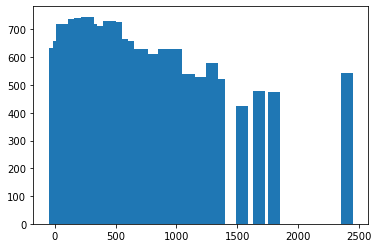

In [8]:
#Look at what some of the relationships might look like...
plt.bar(df['minutesPerWeekEnglish'], df['readingScore'], width = 100.0) # A bar chart
plt.show()

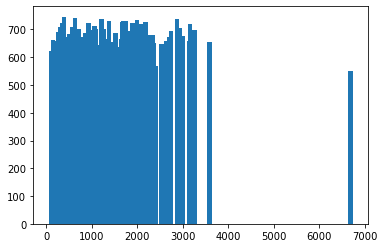

In [9]:
#More bar plots
plt.bar(df['schoolSize'], df['readingScore'], width = 100.0) # A bar chart
plt.show()

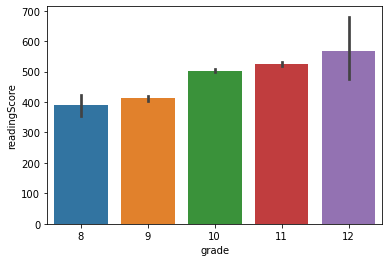

In [10]:
#Bar plots using seaborn
ax = sns.barplot(x="grade", y="readingScore", data=df)

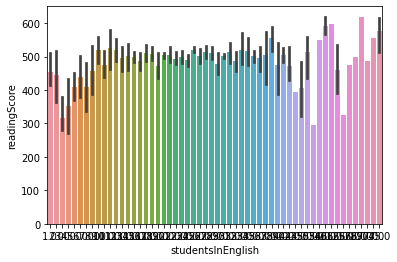

In [11]:
#More bar plots
ax = sns.barplot(x="studentsInEnglish", y="readingScore", data=df)

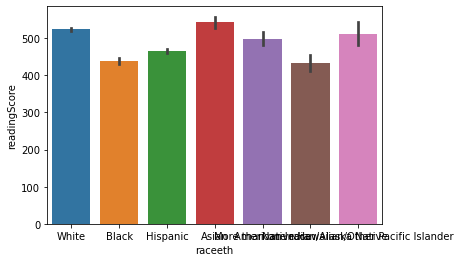

In [12]:
#More bar plots
ax = sns.barplot(x="raceeth", y="readingScore", data=df)

In [13]:
#Make a list of all of the variables that are not 1s or 0s
vars = ['grade', 'raceeth', "minutesPerWeekEnglish", "studentsInEnglish", "schoolSize", "readingScore"]

#Turn wide data into long data
df2 = pd.melt(df, id_vars = vars)
df2.head()

,grade,raceeth,minutesPerWeekEnglish,studentsInEnglish,schoolSize,readingScore,variable,value
0,11,NaN,225.0,NaN,673.0,476.00,male,1.0
1,11,White,450.0,25.0,1173.0,575.01,male,1.0
2,9,White,250.0,28.0,1233.0,554.81,male,1.0
3,10,Black,200.0,23.0,2640.0,458.11,male,0.0
4,10,Hispanic,250.0,35.0,1095.0,613.89,male,1.0


In [14]:
#Convert values to booleans
df2["value"] = df2["value"].astype(bool)
df2.head()

,grade,raceeth,minutesPerWeekEnglish,studentsInEnglish,schoolSize,readingScore,variable,value
0,11,NaN,225.0,NaN,673.0,476.00,male,True
1,11,White,450.0,25.0,1173.0,575.01,male,True
2,9,White,250.0,28.0,1233.0,554.81,male,True
3,10,Black,200.0,23.0,2640.0,458.11,male,False
4,10,Hispanic,250.0,35.0,1095.0,613.89,male,True


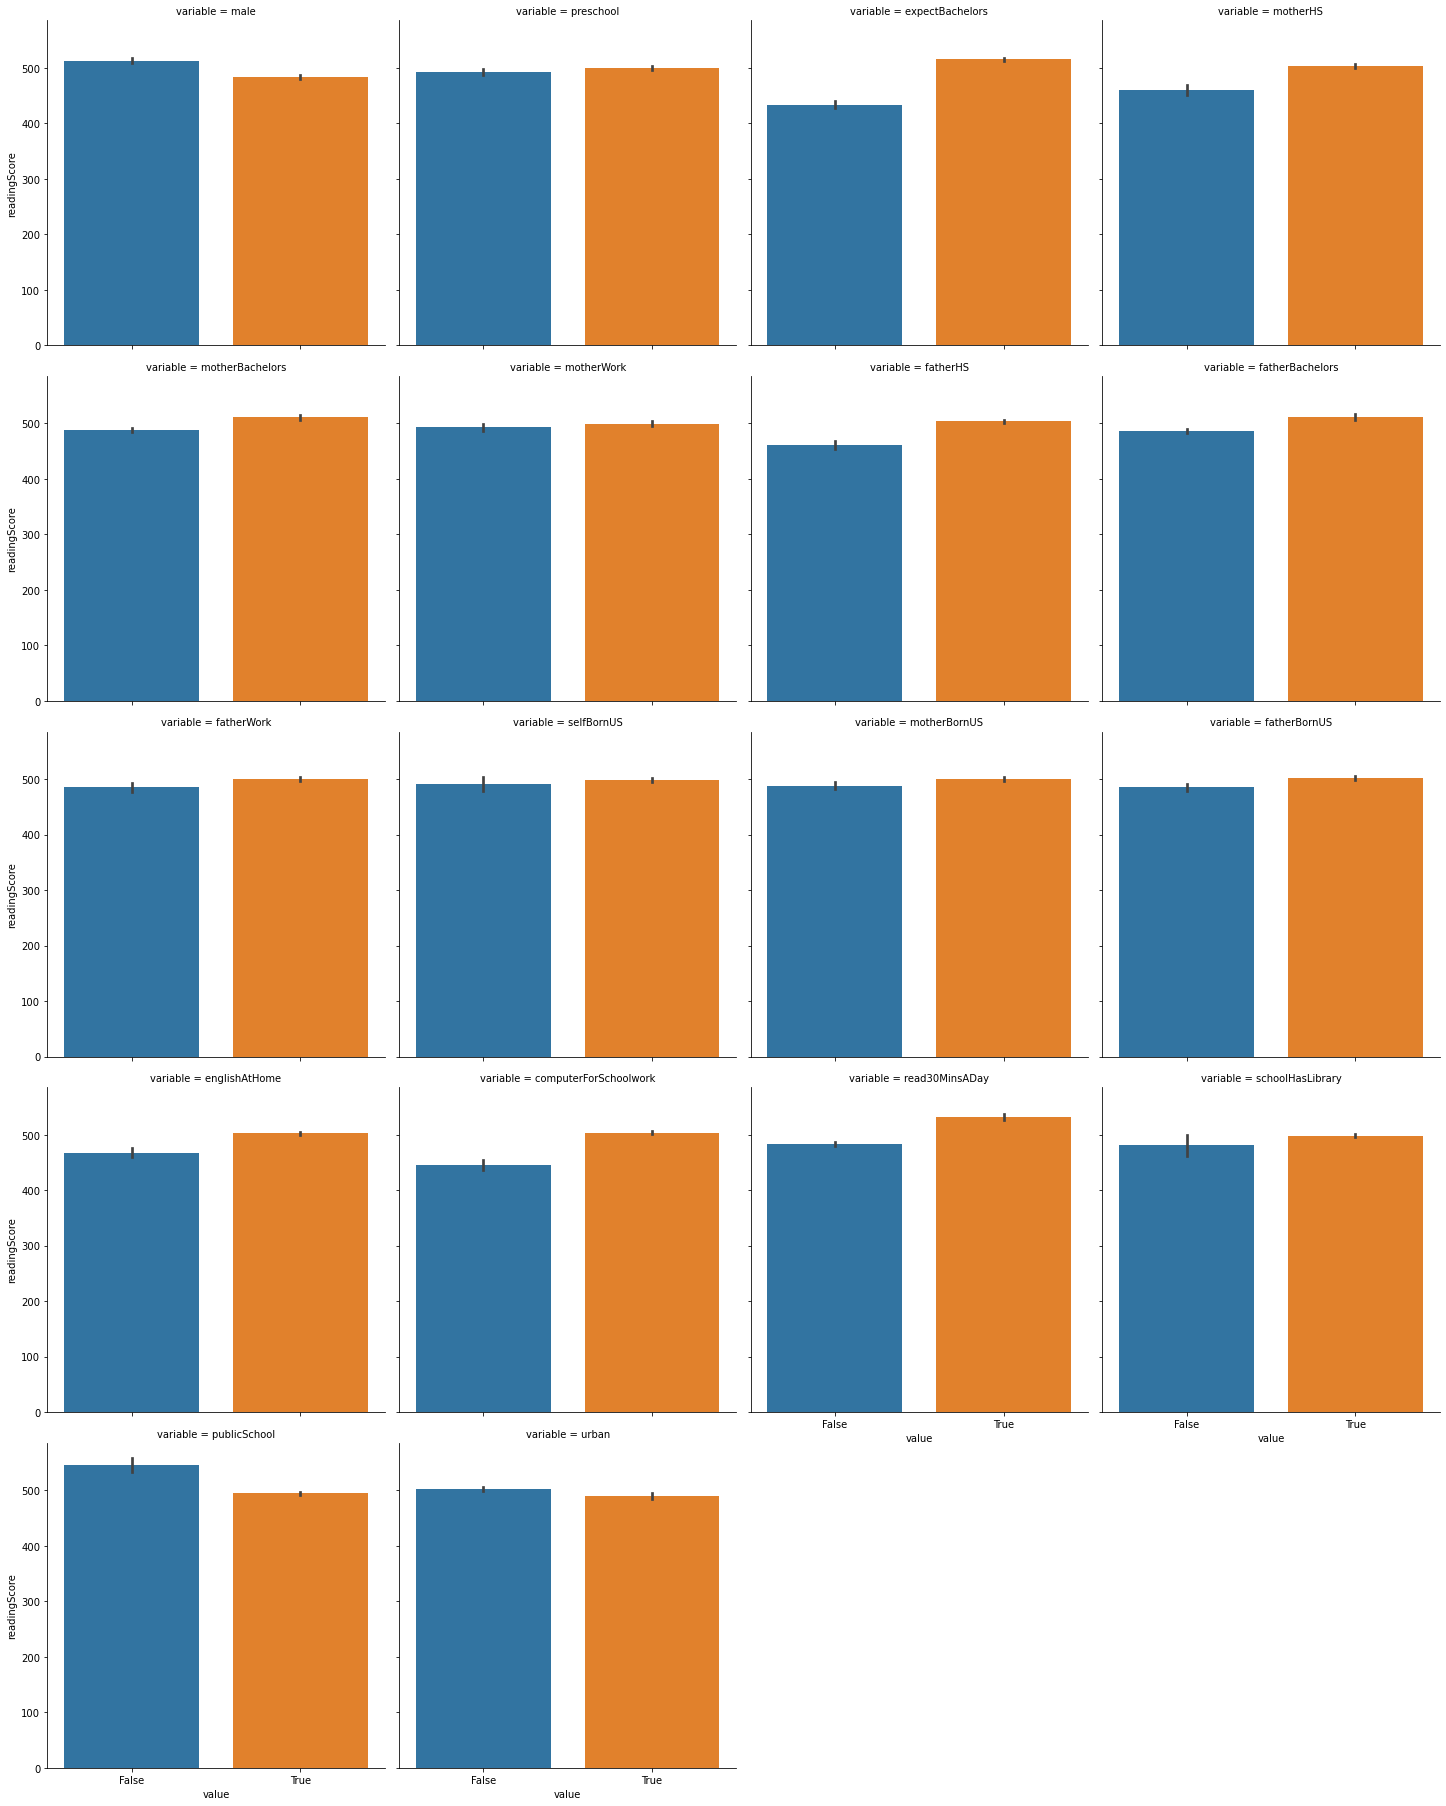

In [15]:
#Catplot
g = sns.catplot(x="value", y="readingScore",
                col="variable",
                data=df2, kind="bar", col_wrap = 4)

It seems that there might be relationships between readingScore and the following measures: grade, race, gender, expectBachelor, motherHS, motherBachelors,fatherHS, fatherBachelors, englishAtHome, computerForSchoolwork, read30MinsADay, publicSchool.

Let's check the assumptions of Linear regression...

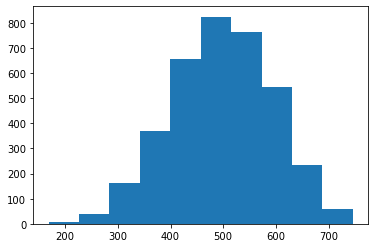

In [16]:
#Check normality of reading Scores
plt.hist(df['readingScore']) # A histogram
plt.show()

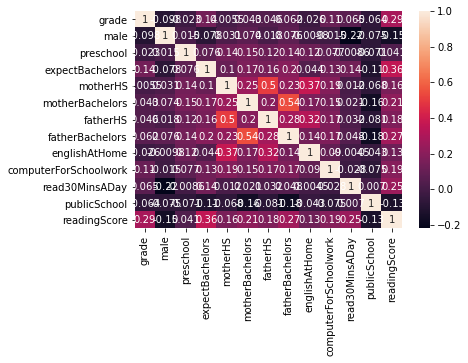

In [17]:
#Slightly skewed, but I think we can live with that... Let's check for multi-collinearity
#First, let's drop the columns we're not interested in..

vars2 = ['motherWork', 'raceeth', 'fatherWork', 'selfBornUS', 'motherBornUS', 'fatherBornUS', 'minutesPerWeekEnglish', 
         'studentsInEnglish', 'schoolHasLibrary', 'urban', 'schoolSize']
dftrain = df.drop(columns = vars2)

#Pearson’s Bivariate Correlation Heatmap
corrMatrix = dftrain.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [18]:
dftrain = dftrain.dropna()

In [19]:
X_train = dftrain[['grade', 'male', 'expectBachelors', 'motherHS', 'motherBachelors', 'fatherHS', 
             'fatherBachelors', 'englishAtHome', 'computerForSchoolwork', 'read30MinsADay', 'publicSchool']]
Y_train = dftrain['readingScore']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

#with statsmodels
X_train = sm.add_constant(X_train) # adding a constant
 
model_fit = sm.OLS(Y_train, X_train).fit()
print_model = model_fit.summary()
print(print_model)
# create dataframe from X, Y for easier plot handling
dataframe = pd.concat([X_train, Y_train], axis=1) 

Intercept: 
 57.417831743117915
Coefficients: 
 [ 34.71338708 -14.81847285  57.16436982   9.05456297  13.45775894
   5.73205079  25.82987297  15.08451882  31.91619401  32.08823741
 -17.5614429 ]
                            OLS Regression Results                            
Dep. Variable:           readingScore   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     103.3
Date:                Wed, 03 Mar 2021   Prob (F-statistic):          4.15e-198
Time:                        21:07:07   Log-Likelihood:                -16375.
No. Observations:                2832   AIC:                         3.277e+04
Df Residuals:                    2820   BIC:                         3.285e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
               

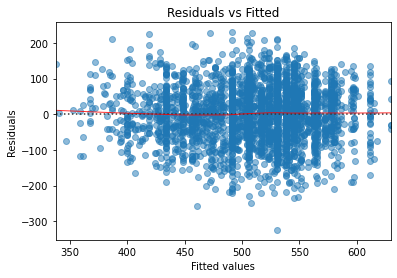

In [20]:
#Residuals vs Fitted Plot

# model values
model_fitted_y = model_fit.fittedvalues
# model residuals
model_residuals = model_fit.resid
# normalized residuals
model_norm_residuals = model_fit.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
# absolute residuals
model_abs_resid = np.abs(model_residuals)
# leverage, from statsmodels internals
model_leverage = model_fit.get_influence().hat_matrix_diag
# cook's distance, from statsmodels internals
model_cooks = model_fit.get_influence().cooks_distance[0]

plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sns.residplot(x = model_fitted_y, y = dataframe.columns[-1], data=dataframe,
                          lowess=True,
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals');

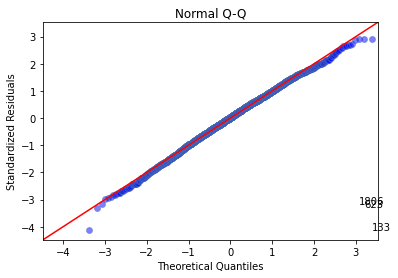

In [21]:
#Check Normal Q-Q Plot
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');
# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]
for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i,
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]));

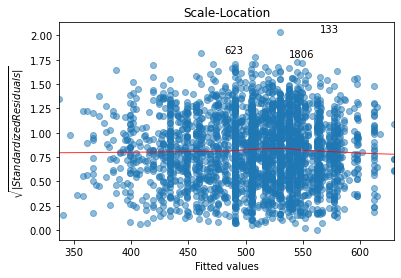

In [22]:
#Check for heteroscedasticity

plot_lm_3 = plt.figure()
plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5);
sns.regplot(x = model_fitted_y, y = model_norm_residuals_abs_sqrt,
            scatter=False,
            ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

# annotations
abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt), 0)
abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]
for i in abs_norm_resid_top_3:
    plot_lm_3.axes[0].annotate(i,
                               xy=(model_fitted_y[i],
                                   model_norm_residuals_abs_sqrt[i]));

In [23]:
#VIF check for multicollinearity (Just to double check)
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

for i in range(len(dftrain.columns[:-1])):
    v = vif(np.matrix(dftrain[:-1]), i)
    print("Variance Inflation Factor for {}: {}".format(dftrain.columns[i],round(v,2)))

Variance Inflation Factor for grade: 64.56
Variance Inflation Factor for male: 2.13
Variance Inflation Factor for preschool: 3.77
Variance Inflation Factor for expectBachelors: 6.25
Variance Inflation Factor for motherHS: 13.06
Variance Inflation Factor for motherBachelors: 2.28
Variance Inflation Factor for fatherHS: 10.35
Variance Inflation Factor for fatherBachelors: 2.32
Variance Inflation Factor for englishAtHome: 9.91
Variance Inflation Factor for computerForSchoolwork: 11.44
Variance Inflation Factor for read30MinsADay: 1.57
Variance Inflation Factor for publicSchool: 13.16


In [24]:
#Redo the model sans grade (VIF 64.56!!!), motherHS (p > 0.05), and computerForSchoolwork

vars3 = ['grade', 'motherHS', 'computerForSchoolwork']

dftrain2 = dftrain.drop(columns = vars3)

X_train2 = dftrain2[['male', 'expectBachelors', 'motherBachelors', 'fatherHS', 
             'fatherBachelors', 'englishAtHome', 'read30MinsADay', 'publicSchool']]
Y_train2 = dftrain2['readingScore']
 
# with sklearn
regr2 = linear_model.LinearRegression()
regr2.fit(X_train2, Y_train2)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

#with statsmodels
X_train3 = sm.add_constant(X_train2) # adding a constant
 
model_fit2 = sm.OLS(Y_train, X_train3).fit()
print_model2 = model_fit2.summary()
print(print_model2)
# create dataframe from X, Y for easier plot handling
dataframe2 = pd.concat([X_train3, Y_train2], axis=1)

Intercept: 
 57.417831743117915
Coefficients: 
 [ 34.71338708 -14.81847285  57.16436982   9.05456297  13.45775894
   5.73205079  25.82987297  15.08451882  31.91619401  32.08823741
 -17.5614429 ]
                            OLS Regression Results                            
Dep. Variable:           readingScore   R-squared:                       0.234
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     107.7
Date:                Wed, 03 Mar 2021   Prob (F-statistic):          3.01e-157
Time:                        21:07:10   Log-Likelihood:                -16478.
No. Observations:                2832   AIC:                         3.297e+04
Df Residuals:                    2823   BIC:                         3.303e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
               

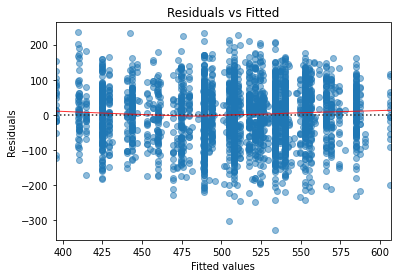

In [25]:
#Residuals vs Fitted Plot

# model values
model_fitted_y2 = model_fit2.fittedvalues
# model residuals
model_residuals2 = model_fit2.resid
# normalized residuals
model_norm_residuals2 = model_fit2.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt2 = np.sqrt(np.abs(model_norm_residuals))
# absolute residuals
model_abs_resid2 = np.abs(model_residuals)
# leverage, from statsmodels internals
model_leverage2 = model_fit2.get_influence().hat_matrix_diag
# cook's distance, from statsmodels internals
model_cooks2 = model_fit2.get_influence().cooks_distance[0]

plot_lm_1_2 = plt.figure()
plot_lm_1_2.axes[0] = sns.residplot(x = model_fitted_y2, y = dataframe2.columns[-1], data=dataframe2,
                          lowess=True,
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1_2.axes[0].set_title('Residuals vs Fitted')
plot_lm_1_2.axes[0].set_xlabel('Fitted values')
plot_lm_1_2.axes[0].set_ylabel('Residuals');

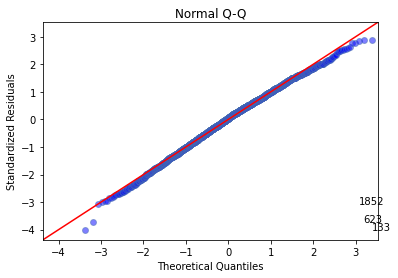

In [26]:
#Check Normal Q-Q Plot
QQ = ProbPlot(model_norm_residuals2)
plot_lm_2_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
plot_lm_2_2.axes[0].set_title('Normal Q-Q')
plot_lm_2_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2_2.axes[0].set_ylabel('Standardized Residuals');
# annotations
abs_norm_resid2 = np.flip(np.argsort(np.abs(model_norm_residuals2)), 0)
abs_norm_resid_top_3_2 = abs_norm_resid2[:3]
for r, i in enumerate(abs_norm_resid_top_3_2):
    plot_lm_2_2.axes[0].annotate(i,
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals2[i]));

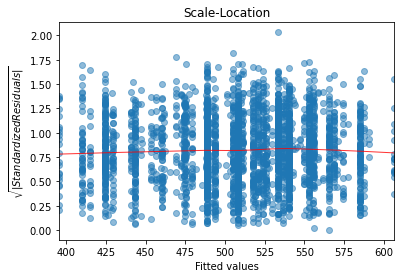

In [27]:
#Check for heteroscedasticity

plot_lm_3_2 = plt.figure()
plt.scatter(model_fitted_y2, model_norm_residuals_abs_sqrt2, alpha=0.5);
sns.regplot(x = model_fitted_y2, y = model_norm_residuals_abs_sqrt2,
            scatter=False,
            ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plot_lm_3_2.axes[0].set_title('Scale-Location')
plot_lm_3_2.axes[0].set_xlabel('Fitted values')
plot_lm_3_2.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');


In [42]:
#VIF check for multicollinearity (again)
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

for i in range(len(dftrain2.columns[:-1])):
    v = vif(np.matrix(dftrain2[:-1]), i)
    print("Variance Inflation Factor for {}: {}".format(dftrain2.columns[i],round(v,2)))

Variance Inflation Factor for male: 2.02
Variance Inflation Factor for preschool: 3.65
Variance Inflation Factor for expectBachelors: 6.22
Variance Inflation Factor for motherBachelors: 2.25
Variance Inflation Factor for fatherHS: 8.55
Variance Inflation Factor for fatherBachelors: 2.29
Variance Inflation Factor for englishAtHome: 9.0
Variance Inflation Factor for read30MinsADay: 1.56
Variance Inflation Factor for publicSchool: 9.54


In [29]:
#Import testing dataset
df_test_orig = pd.read_csv("./pisa2009test.csv")
df_test = df_test_orig
df_test.head()

,grade,male,raceeth,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,...,englishAtHome,computerForSchoolwork,read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,schoolHasLibrary,publicSchool,urban,schoolSize,readingScore
0,10,0,White,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,0.0,240.0,30.0,1.0,1,0,808.0,355.24
1,10,1,White,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,255.0,NaN,1.0,1,0,808.0,385.57
2,10,0,White,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,NaN,30.0,1.0,1,0,808.0,522.62
3,10,0,White,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,0.0,160.0,30.0,NaN,1,0,808.0,406.24
4,10,0,White,1.0,1.0,1.0,0.0,0.0,1.0,1.0,...,1.0,1.0,0.0,240.0,30.0,1.0,1,0,808.0,453.50


In [30]:
df_test = df_test.drop(columns = vars2 + vars3)
df_test.head()

,male,preschool,expectBachelors,motherBachelors,fatherHS,fatherBachelors,englishAtHome,read30MinsADay,publicSchool,readingScore
0,0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1,355.24
1,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1,385.57
2,0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1,522.62
3,0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1,406.24
4,0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1,453.50


In [31]:
#Get some baseline info about each value
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1570 entries, 0 to 1569
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             1570 non-null   int64  
 1   preschool        1549 non-null   float64
 2   expectBachelors  1547 non-null   float64
 3   motherBachelors  1382 non-null   float64
 4   fatherHS         1445 non-null   float64
 5   fatherBachelors  1282 non-null   float64
 6   englishAtHome    1543 non-null   float64
 7   read30MinsADay   1549 non-null   float64
 8   publicSchool     1570 non-null   int64  
 9   readingScore     1570 non-null   float64
dtypes: float64(8), int64(2)
memory usage: 122.8 KB


In [32]:
#Check for NULL values
df_test.isnull().sum()

male                 0
preschool           21
expectBachelors     23
motherBachelors    188
fatherHS           125
fatherBachelors    288
englishAtHome       27
read30MinsADay      21
publicSchool         0
readingScore         0
dtype: int64

Text(0, 0.5, 'Predictions')

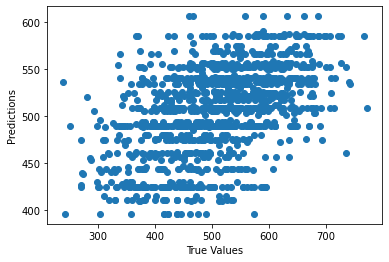

In [33]:
#Drop null values
df_test = df_test.dropna()

#Create testing values
X_test = df_test[['male', 'expectBachelors', 'motherBachelors', 'fatherHS', 
             'fatherBachelors', 'englishAtHome', 'read30MinsADay', 'publicSchool']]
Y_test = df_test['readingScore']

#Create Predictions
predictions = regr2.predict(X_test)

#Plot True Values vs. Predictions
plt.scatter(Y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [34]:
#Mean Absolute Error
mae = mean_absolute_error(Y_test, predictions)
print('MAE: %.3f' % mae)

#Accuracy
print("Train Accuracy", regr2.score(X_train2, Y_train2))
print("Test Accuracy", regr2.score(X_test, Y_test))

MAE: 65.712
Train Accuracy 0.23386562934981148
Test Accuracy 0.2289413897821828


Feature 0: 52.862308
Feature 1: 434.919540
Feature 2: 161.825483
Feature 3: 97.350447
Feature 4: 241.345992
Feature 5: 45.916555
Feature 6: 158.935445
Feature 7: 47.578755


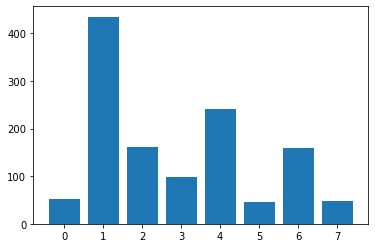

In [35]:
# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=f_regression, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train2, Y_train2, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [36]:
#Look at the results when the model has fewer features

# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select a subset of features
    fs = SelectKBest(score_func=f_regression, k=5)
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train2, Y_train2, X_test)
# fit the model
model = linear_model.LinearRegression()
model.fit(X_train_fs, Y_train2)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
mae = mean_absolute_error(Y_test, yhat)
print('MAE: %.3f' % mae)

#Accuracy
print("Train Accuracy", model.score(X_train_fs, Y_train2))
print("Test Accuracy", regr2.score(X_test, Y_test))

MAE: 65.871
Train Accuracy 0.21840405083536174
Test Accuracy 0.2289413897821828


Mae goes up and accuracy goes down